<a href="https://colab.research.google.com/github/MJMortensonWarwick/computational_lit_review/blob/main/CLR_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computational Literature Review (CLR)
This notebook will demonstrate the CLR process and can be ran to complete a literature review directly from your browser.

To begin with we just need to install the software from [GitHub](https://github.com/MJMortensonWarwick/computational_lit_review/tree/main) using the following code. This may take a few minutes.

_Note: to run code in Colab just click the play icon on the left of the code block. You can also run all the code by clicking_ __Runtime > Run all__ _from the main menu._

In [1]:
%%capture
!git clone https://github.com/MJMortensonWarwick/computational_lit_review
%cd /content/computational_lit_review/
!pip install -r requirements.txt
from utils import *
%cd /content/

## 1 Data Loading
The CLR process is applied to an RIS file, which is a standard format for academic reference data used by academic databases such as Elseveir (Scopus) and Web of Science, as well as citation management software such as Endnote or Mendeley.

You can download a RIS file from nearly all academic databases on which you may search for papers, but we provide instructions for the two most commonly used, Scopus and Web Of Science.

### 1.1 Scopus
Video here ...

### 1.2 Web of Science
Video here ...

### 1.3 Uploading Data to the CLR
When you download the file, make sure it is saved in a location you can access it, and that you keep note of the file name (e.g. "_scopus.ris_" or "_savedrecs.ris_").

Once you have the file downloaded, we can upload into the Colab interface by clicking "Chose Files" below. This will allow you to search for the file using your system folder tools.

In [2]:
from google.colab import files
upload = files.upload()

Saving scopus.ris to scopus.ris


Once the file is uploaded, then we can display the records to screen:

In [3]:
# if required, change the file name ('scopus.ris') to match your file name
df = file_loader('scopus.ris')
df.tail()

# if using web of science outputs then change the above code to:
# df = file_loader('savedrecs.ris', source='wos')

,DOI,Title,Authors,Year,Source,Volume,Start,End,Abstract,Citations,Type
1191,NaN,16th International Conference on Cooperative D...,NaN,2019,Lecture Notes in Computer Science (including s...,11792 LNCS,NaN,NaN,The proceedings contain 32 papers. The special...,0,JOUR
1192,10.1109/ICDIM.2014.6991352,Enhance the performance of neural networks for...,"[Boonpeng, S., Jeatrakul, P.]",2014,2014 9th International Conference on Digital I...,NaN,1,6,Stock market prediction is a challenging task ...,5,CONF
1193,10.1109/CCBD.2016.032,Binary classification and data analysis for mo...,"[Tung, H.-H., Cheng, C.-C., Chen, Y.-Y., Chen,...",2017,Proceedings - 2016 7th International Conferenc...,NaN,116,121,This paper studies on the Day-of-the-week effe...,12,CONF
1194,10.1109/CCBD.2016.027,Financial time-series data analysis using deep...,"[Chen, J.-F., Chen, W.-L., Huang, C.-P., Huang...",2017,Proceedings - 2016 7th International Conferenc...,NaN,87,92,A novel financial time-series analysis method ...,98,CONF
1195,NaN,ACM International Conference Proceeding Series,NaN,2018,ACM International Conference Proceeding Series,NaN,NaN,NaN,The proceedings contain 18 papers. The topics ...,0,CONF


As you can see, one aspect of the data is that it provides a lot of bibliographic and statistical information about publications in our search criteria. These can be used to perform _exploratory data analysis_ of our research area.

## 2 Exploratory Data Analysis (EDA)
The CLR builds in a bunch of common visualisations that can be used in a literature review. These include:


*   __Publications by Year__: The total number of publications in the research area that are published each year. This can tell you if the area is growing in popularity, stable, or (hopefully not) declining in popularity. Note, as publications are still being confirmed, it is common that the last year(s) in the visualisation will show a drop in publications as this is a "work in progress".
*   __Citations by Year__: Similar to the previous, Citations by Year will tell us something of the popularity of the area, but by looking at how many citations each publication achieved. Note, again, more recent publications are even more effected by a negative recency bias ... a paper that has just been published has not had the opportunity to achieve any citations.
* __Top Papers by Citations__: This function identifies the papers with the highest overall citations. This represents a crude, but still useful, measure of the impact of a paper. I.e. we can consider a citation as a 'vote of confidence' in a paper - that another set of researchers wanted to make reference to the work. Again, some care is needed when evaluating the most recent papers for the reasons given above.
* __Top Authors by Citation__: Although we may care about the most influential papers, we may also want to know which authors are most influential in our area. This can help us identify who are the most important writers in the space, and the work associated with them.
* __Top Authors by _h_-index__: One observed issue with just counting an author's citations is that in certain instances we may have "one-hit wonders" ... that is an author who has generally a low number of citations but one paper that was very well cited. I.e. our results become biased by single items that are disproportionately large. The [_h_-index](https://en.wikipedia.org/wiki/H-index) is a metric that is commonly used to deal with this issue and summarise the influence of an author. Please refer to the [Wikipedia page](https://en.wikipedia.org/wiki/H-index) for a full explanation, but basically an author who has a _h_-index of 5 is an author who has at least five papers that have at least five citations each. _Note: in this case we are producing a local h-index not a global one. That means this is the h-index using only papers included in our RIS file, not necessarily all of an author's publications. If you were to look up one of the author's profiles on Google Scholar it would be likely they have a much higher (global) h-index._
* __Top Sources by Citation__: Alongside measuring the influence of authors, we are often also interested in the influence of particular publication venues (e.g. journals) in our research area. This function identifies these top sources by the citation metric.
* __Top Sources by _h_-index__: Similarly to the author analysis, we can also evaluate a (local) _h_-index for each publication venue.

For each of these areas we produce three files, a web page (html file), which we can open in a browser and explore interactively, an image file and a data file (CSV file) we can open in Excel or spreadsheet tool of our choosing. We can create all of these metrics by running a single line of code:



In [4]:
eda = corpus_eda(df)

The function has downloaded (to our Colab instance - we will download via the browser to your machine later on) all the figures/datasets described above. We can view them in the Notebook by specifying a figure by name:

In [5]:
eda["top_author_hindex"].show()

The full list of code commands for each visualisation is available [here](#).

## 3 Topic Model
The topic model (primarily based on [BERTopic](https://maartengr.github.io/BERTopic/index.html)), is used to find the topics (subjects and research themes) that are included in the data. The goal is to be able to find the papers that are relevant to your research interests and evaluate the overall thematic area. Although there are many options in how we build this model, we will use here the basic configuration which will automatically find topics for us:

In [6]:
# specify the model
model = topic_model(df)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
# fit the model to the data
corpus, topics, probs = fit_topic_model(df, model)

# show the high level topic information
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,337,-1_fintech_finance_banking_financial,"[fintech, finance, banking, financial, blockch...",[Purpose: This study provides valuable insight...
1,0,53,0_lending_lendingclub_lenders_loans,"[lending, lendingclub, lenders, loans, loan, c...","[Over the last decade, the fintech industry ha..."
2,1,40,1_forecasting_forecast_prediction_neural,"[forecasting, forecast, prediction, neural, cn...",[Many studies have been undertaken with machin...
3,2,35,2_regulatory_regulation_ai_regulations,"[regulatory, regulation, ai, regulations, fint...",[Financial industry was the first filed where ...
4,3,35,3_fintech_banking_financial_finance,"[fintech, banking, financial, finance, innovat...",[Indian Banking system have a lot on their pla...
5,4,32,4_forecasting_forecast_prediction_predicting,"[forecasting, forecast, prediction, predicting...",[Stock market prediction is one of the most cr...
6,5,31,5_fraud_frauds_fraudulent_datasets,"[fraud, frauds, fraudulent, datasets, fintech,...",[With the continuous expansion of the banks' c...
7,6,28,6_prediction_stocks_predicting_classifiers,"[prediction, stocks, predicting, classifiers, ...",[Forecasting stock market behavior has receive...
8,7,27,7_banking_ai_fintech_intelligence,"[banking, ai, fintech, intelligence, financial...",[With artificial intelligence entering all sph...
9,8,26,8_fintech_finance_financial_banking,"[fintech, finance, financial, banking, islamic...",[The present study provides a systematic revie...


The summary function (_get\_topic\_info_) provides information on the topics found. The first row (__topic -1__) is an outlier topic (i.e. it includes all the content that doesn't fit in one of our found topics) and is ignored. In the example here (although this would change if you are using your own data) we found 51 topics - from __topic 0__ through to __topic 50__.

The columns of the table show:


1.   __Topic__: the ID of the topic;
2.   __Count__: the number of documents that have this topic as their main topic;
3. __Name__: the autogenerated name for the topic (the topic ID number and the four most representative words in the topic;
4. __Representation__: the most representative words - as with __Name__ but showing more words;
5. __Representative\_docs__: the text from the most representative document of the topic.

We have more advanced tools to interpret the topic shown below in section 3.3, but this gives us an initial view of the topics and, in particular, how many topics were found.





###3.1 Reduce Topics
In many cases, and in almost all cases for masters-level research, the initial model fit will likely find more topics than are practical for us to work with. We include functionality to reduce the number of topics (i.e. find higher-level / more general topics). You can specify a particular number of topics, or we can use the algorithm to automatically find a smaller number of topics.

In [8]:
# reduce the number of topics if desired
# if you want a specific number of topics then specify nr_topics = K
# (where K is the number of topics)
# otherwise the algorithm will automatically identify a suitable value
model = drop_topics(corpus, model)
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,337,-1_finance_financial_fintech_banking,"[finance, financial, fintech, banking, blockch...",[The importance of access to finance as a sign...
1,0,175,0_fintech_banking_financial_finance,"[fintech, banking, financial, finance, banks, ...",[Artificial intelligence and blockchain are ga...
2,1,169,1_stocks_forecasting_predicting_prediction,"[stocks, forecasting, predicting, prediction, ...",[Stock price prediction is one of the most ext...
3,2,119,2_lending_loan_lenders_loans,"[lending, loan, lenders, loans, banking, credi...",[As an emerging business model innovation in t...
4,3,114,3_ai_banking_finance_fintech,"[ai, banking, finance, fintech, financial, ban...",[The use of artificial intelligence (AI) withi...
5,4,62,4_investors_fintech_marketing_investment,"[investors, fintech, marketing, investment, ro...","[In fintech, robo-advisors are a helpful techn..."
6,5,34,5_finance_data_banking_fintech,"[finance, data, banking, fintech, financial, a...","[With the vigorous development of fintech, the..."
7,6,27,6_blockchain_trust_fintech_decentralized,"[blockchain, trust, fintech, decentralized, fe...",[It is expected that peer to peer energy tradi...
8,7,24,7_fintech_finance_financial_banks,"[fintech, finance, financial, banks, economic,...",[An essential structural modification that is ...
9,8,22,8_cnn_classifiers_lending_credit,"[cnn, classifiers, lending, credit, classifica...",[Digital technologies produce vast amounts of ...


We have now gone from 51 topics down to 19 (again ignoring __topic -1__ which is the outlier topic) in the example dataset - although again this will change with different data. Much easier to work with.

###3.2 Visualise Topics
Once we have settled on the number of topics we want to explore them further. As with the Exporatory Data Analysis (EDA) section, the software produces a range of visualisations and data outputs to help interpret the topics. These include:


*   __Distance Map__: a visualisation of how different topics relate to each other (the closer the topics are in the visualisation the more overlap they have);
*   __Topic barcharts__: thes provide a concise summary of the top keywords that are most representative of each topic, and their relative frequency (the bar in the barchart);
* __Similiarity Matrix__: the similarity matrix returns the correlation between topics. If there is a strong positive correlation (a number approaching 1) then this means that the two topics are likely to occur together.
* __Topic Dataframe__: the final output is a CSV file (which can be opened in Excel or similar software) that combines the article information from the RIS file with the topic scores. The topic scores are the percentage of each document that discusses each topic. E.g. if a topic score for topic _x_ is 0.5 this means that 50% of the abstract is about topic _x_.

As before, we create a folder we will download later in the tutorial, but we can also show individual visualisations to screen:


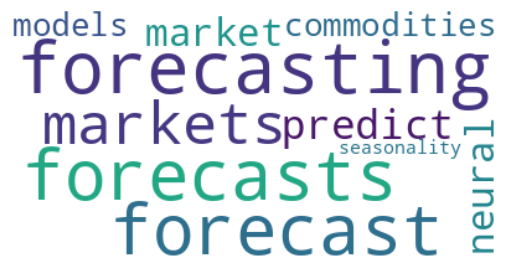

In [9]:
printout = topic_outputs(corpus, model, topics)
printout["topic_bar"].show()

The full list of code commands for each visualisation is available [here](#).

###3.3 Interpreting Topics with the Topic Report
In order to determine if a topic is relevant to your research then we need to first interpret it. The _get\_topic\_info_ function and the visualisations above can help with this, but we also provide a Topic Report to summarise each topic. The topic report is generated in the _topic\_outputs\ function above, and we can download the PDF using the following code:

In [10]:
download = files.download('/content/output/topic_report.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The Topic Report includes:

*   a wordcloud for the topic's most important keywords;
*   the journals that feature the topic the most;
* the articles/publications that feature the topic the most;
* a sample from the abstracts of the top articles/publications.

It is recommended to read through these to confirm your interpretation of each topic.

###3.4 Interpreting Topics with ChatGPT (and other LLMs)
You can use tools like ChatGPT (or other large language models - LLMs) to help you interpret a topic. The software supports the creation of a prompt template that can be copied and pasted into ChatGPT/your preferred LLM. We just need to specify a particular topic ID number to generate the template:

In [11]:
# create a prompt template for topic #1
# change the value of 1 for any topic number you want to explore
chatgpt = prompt_template(1, model)
print(chatgpt)

I have topic that contains the following documents:
Stock price prediction is one of the most extensively studied and challenging glitches, which is acting so many academicians and industries experts from many fields comprising of economics, and business, arithmetic, and computational science. Predicting the stock market is not a simple task, mainly as a magnitude of the close to random-walk behavior of a stock time series. Millions of people across the globe are investing in stock market daily. A good stock price prediction model will help investors, management and decision makers in making correct and effective decisions. In this paper, we review studies on supervised machine learning models in stock market predictions. The study discussed how supervised machine learning techniques are applied to improve accuracy of stock market predictio
 Efficient Market Hypothesis (EMH) is the cornerstone of the modern financial theory and it states that it is impossible to predict the price of an

##4 Literature Shortlist
The final functionality is to create a shortlist of papers to include in your literature review. Here you can state your preferences in ranking the papers across three diminesions:


1.   The number of citations each paper has (more citations indicates more influential work);
2.   The recency of the publication (in some domains it is important to prioritise more recent research);
3. The topics covered in the research (i.e. we want to include the research that is relevant to our question and area).

For each of these we can rank, using the sliders below, how important each element is. For instance, the default setting of citations = 5, recency = 0 and topics = 10 means that we completely ignore recency in ranking the papers, and rank based 33% on number of citations and 67% on topic relevancy. You can move these around based on what best suits your research.

If we want to include topics in the ranking we need to also rank the topics. For each of the topics there is a similar slider and we can increase the value on topics that are relevant, and reduce (often to zero) any topics that are not as relevant.



In [12]:
display_form = form_display(model)
display_form['output']

Output(layout=Layout(border='1px solid black'))

Once we have ranked the criteria and topics we can add these to the model. _Note: if you update the sliders you will need to run the next line of code again to update the model_.

In [13]:
topic_weights = value_updates(display_form)
topic_weights

{'cites': 0.5,
 'recency': 0.0,
 'topics': 1.0,
 '0_fintech_banking_financial_finance': 0.5,
 '1_stocks_forecasting_predicting_prediction': 0.5,
 '2_lending_loan_lenders_loans': 0.5,
 '3_ai_banking_finance_fintech': 0.5,
 '4_investors_fintech_marketing_investment': 0.5,
 '5_finance_data_banking_fintech': 0.5,
 '6_blockchain_trust_fintech_decentralized': 0.5,
 '7_fintech_finance_financial_banks': 0.5,
 '8_cnn_classifiers_lending_credit': 0.5,
 '9_liquidity_portfolios_portfolio_investable': 0.5,
 '10_classification_computing_algorithms_networks': 0.5,
 '11_privacy_adversarial_dataset_security': 0.5,
 '12_diversification_stocks_portfolio_investor': 0.5,
 '13_insurer_insurance_insurers_insured': 0.5,
 '14_laundering_cryptocurrency_bitcoin_trafficking': 0.5,
 '15_investors_advisors_investor_portfolio': 0.5,
 '16_recommender_recommending_data_recommendation': 0.5,
 '17_projects_design_development_workshop': 0.5,
 '18_forecasting_forecasts_forecast_markets': 0.5}

Now we can return however many papers we want to include in our study based upon this ranking. In this example we will download the top 30 papers, and we will create both a CSV (Excel) file and a RIS file.

The RIS file can then be imported into Endnote or Mendley to support your future literature review processes. When you do this, you will find the following information has been added for each paper:


*   __C1__: the overall score of the paper (using the above ranking criteria);
*   __C2__: the citation score of the paper;
* __C3__: the recency score of the paper;
* __C4__: the topic score of the paper.



In [14]:
# return the top 30 papers
# if you want a different number of papers change the value after "n=" to the amount required
# change the ris_file value if your RIS file has a different name
ranked_df = return_included_papers(corpus, model, topic_weights, n=30, ris_file='scopus.ris')
ranked_df.head()

,DOI,Title,Authors,Year,Source,Volume,Start,End,Abstract,Citations,...,13_insurer_insurance_insurers_insured,14_laundering_cryptocurrency_bitcoin_trafficking,15_investors_advisors_investor_portfolio,16_recommender_recommending_data_recommendation,17_projects_design_development_workshop,18_forecasting_forecasts_forecast_markets,cite_score,recency_score,topic_score,score
1162,10.1016/j.techsoc.2017.03.005,Co-evolution between streaming and live music ...,"[Naveed, K., Watanabe, C., Neittaanmäki, P.]",2017,Technology in Society,50,1,19,"While digitization of music, particularly stre...",59,...,0.008737,0.012119,0.041502,0.034894,0.016516,0.000000,0.104610,0.0,1.00,1.104610
535,10.1007/s41060-021-00278-w,Data science and AI in FinTech: an overview,"[Cao, L., Yang, Q., Yu, P.S.]",2021,International Journal of Data Science and Anal...,12,81,99,Financial technology (FinTech) has been playin...,35,...,0.023588,0.007389,0.027258,0.010909,0.014540,0.002310,0.062057,0.0,1.00,1.062057
659,10.1016/j.eneco.2021.105129,Predicting corporate carbon footprints for cli...,"[Nguyen, Q., Diaz-Rainey, I., Kuruppuarachchi,...",2021,Energy Economics,95,NaN,NaN,Corporations have come under pressure from inv...,34,...,0.000000,0.000000,0.081199,0.020024,0.000000,0.011850,0.060284,0.0,1.00,1.060284
573,10.1186/s40537-021-00531-w,A hybrid machine learning method for increasin...,"[Megantara, A.A., Ahmad, T.]",2021,Journal of Big Data,8,NaN,NaN,The internet has grown enormously for many yea...,22,...,0.003494,0.033562,0.016949,0.050332,0.008063,0.025934,0.039007,0.0,1.00,1.039007
806,10.1016/j.techfore.2020.120188,Diversification in the age of the 4th industri...,"[Huynh, T.L.D., Hille, E., Nasir, M.A.]",2020,Technological Forecasting and Social Change,159,NaN,NaN,In the context of the 4th industrial revolutio...,147,...,0.008297,0.000000,0.024701,0.004843,0.004393,0.008849,0.260638,0.0,0.75,1.010638


##5 Download Results
Finally, we create zip files for our exploratory data analysis ("eda"), our topic model visualisation ("output") and our shortlisted records as CSV and RIS ("sources"). We will download these from the browser:

In [15]:
# download eda files
%cd /content/eda/
!zip -r eda.zip ./*
files.download("/content/eda/eda.zip")
%cd /content/

# download output files
%cd /content/output
!zip -r output.zip ./*
files.download("/content/output/output.zip")
%cd /content/

# download sources files
%cd /content/sources/
!zip -r sources.zip ./*
files.download("/content/sources/sources.zip")
%cd /content/

/content/eda
  adding: cites_by_year.csv (deflated 42%)
  adding: cites_by_year.html (deflated 70%)
  adding: cites_by_year.png (deflated 12%)
  adding: pubs_by_year.csv (deflated 32%)
  adding: pubs_by_year.html (deflated 70%)
  adding: pubs_by_year.png (deflated 15%)
  adding: top_author_cites.csv (deflated 51%)
  adding: top_author_cites.html (deflated 70%)
  adding: top_author_cites.png (deflated 12%)
  adding: top_author_hindex.csv (deflated 56%)
  adding: top_author_hindex.html (deflated 70%)
  adding: top_author_hindex.png (deflated 16%)
  adding: top_paper_cites.csv (deflated 66%)
  adding: top_paper_cites.html (deflated 70%)
  adding: top_paper_cites.png (deflated 5%)
  adding: top_source_cites.csv (deflated 64%)
  adding: top_source_cites.html (deflated 70%)
  adding: top_source_cites.png (deflated 8%)
  adding: top_source_hindex.csv (deflated 61%)
  adding: top_source_hindex.html (deflated 70%)
  adding: top_source_hindex.png (deflated 8%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content
/content/output
  adding: cloud_topic0.png (deflated 1%)
  adding: cloud_topic10.png (deflated 1%)
  adding: cloud_topic11.png (deflated 1%)
  adding: cloud_topic12.png (deflated 2%)
  adding: cloud_topic13.png (deflated 1%)
  adding: cloud_topic14.png (deflated 1%)
  adding: cloud_topic15.png (deflated 1%)
  adding: cloud_topic16.png (deflated 1%)
  adding: cloud_topic17.png (deflated 1%)
  adding: cloud_topic18.png (deflated 1%)
  adding: cloud_topic1.png (deflated 1%)
  adding: cloud_topic2.png (deflated 1%)
  adding: cloud_topic3.png (deflated 1%)
  adding: cloud_topic4.png (deflated 1%)
  adding: cloud_topic5.png (deflated 1%)
  adding: cloud_topic6.png (deflated 1%)
  adding: cloud_topic7.png (deflated 1%)
  adding: cloud_topic8.png (deflated 1%)
  adding: cloud_topic9.png (deflated 1%)
  adding: distance_map.html (deflated 70%)
  adding: distance_map.png (deflated 12%)
  adding: similarity_matrix.html (deflated 70%)
  adding: similarity_matrix.png (deflated 9%)
  adding

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content
/content/sources
  adding: export.ris (deflated 66%)
  adding: ranked_df.csv (deflated 59%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content


## 6 Video Walkthrough
Video here ...